 **Problem: There is a lot of false information on the internet, so we need to clean this information to determine if this information is fake news or not** 🔴

**Inputs: Two columns(text and lable)**

**Output: Is the information fake or not**

**Function required: Classification & Prediction**

What is the experimental protocol used and how was it carried out? 

Read Training and Testing Data

Data Preprocessing using Pipline

Splitting data

Validation set

PipeLine

Tuning hyperparameters

Built model
🧘 🧘 🧘  🧘 🧘 🧘

In [ ]:
# this line is for BayesSearchCV and using skopt package
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 1.3 MB/s eta 0:00:00


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_score,recall_score, f1_score,precision_recall_curve
sns.set()
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from time import time
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.model_selection import PredefinedSplit

import re
import pickle
import holoviews as hv
import nltk 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


**load the data**

In [ ]:
# Loading the data from csv files

train_data = pd.read_csv('/content/xy_train.csv')
test_data = pd.read_csv('/content/x_test.csv')
     

In [ ]:
# Look at first records of the data 
train_data.head()

,id,text,label
0,265723,A group of friends began to volunteer at a hom...,0
1,284269,British Prime Minister @Theresa_May on Nerve A...,0
2,207715,"In 1961, Goodyear released a kit that allows P...",0
3,551106,"Happy Birthday, Bob Barker! The Price Is Right...",0
4,8584,"Obama to Nation: 聙""Innocent Cops and Unarmed Y...",0


In [ ]:
# drop the id column as it isn't a feature
train_data = train_data.drop(columns=['id'])
     

**preparing training and testing data for use** 👈

In [ ]:
# save the id of test data to use it in save the result
test_id = test_data['id']

# drop the id column as it isn't a feature
test_data1= test_data.drop(columns=['id'])

In [ ]:
# show the information of the train dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    60000 non-null  object
 1   label   60000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 937.6+ KB


In [ ]:
#Check the data for missing values in training data
train_data.isnull().sum()

text     0
label    0
dtype: int64

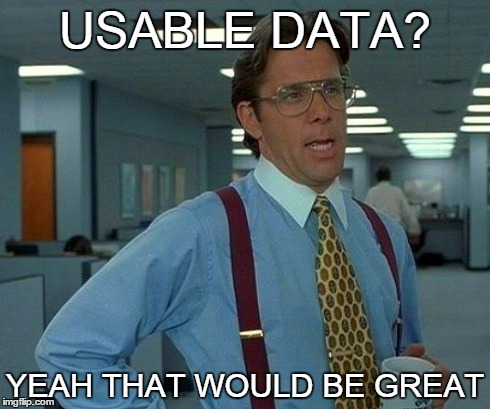

In [ ]:
#Check the  train data for duplicates 
train_data.duplicated().any()

True

In [ ]:
train_data.duplicated().sum()

345

In [ ]:
# First, lets drop duplicates (if any)
train_data= train_data.drop_duplicates()

In [ ]:
#Check the  train data for duplicates 
train_data.duplicated().any()

False

In [ ]:
#describe the text column
train_data['text'].describe()

count                                                 59655
unique                                                59645
top       Finally, I found a sub that photoshops battles...
freq                                                      2
Name: text, dtype: object

In [ ]:
train_data.shape

(59655, 2)

In [ ]:
#check the target column 
train_data['label'].value_counts()

0    31955
1    27468
2      232
Name: label, dtype: int64

In [ ]:
test_data1.isnull().sum()

text    0
dtype: int64

In [ ]:
test_data1.head()

,text
0,stargazer
1,yeah
2,PD: Phoenix car thief gets instructions from Y...
3,"As Trump Accuses Iran, He Has One Problem: His..."
4,"""Believers"" - Hezbollah 2011"


In [ ]:
# check the number of positive vs. negative tagged sentences
positives =  train_data['label'][train_data.label == 1]
negatives =  train_data['label'][train_data.label ==0]
wrong_label= train_data['label'][train_data.label == 2]

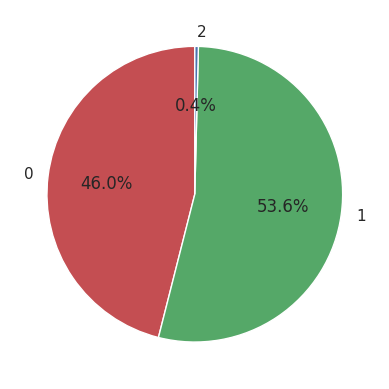

In [ ]:
#import matplotlib.pyplot as plt

slices_len = [len(positives ), len(negatives ), len(wrong_label)]
category = ['0', '1', '2']
colors = ['r', 'g', 'b']

plt.pie(slices_len, labels=category, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

In [ ]:
#"label" should be 0 or 1 so drop any row when "label"=2
train_data=train_data[train_data.label != 2]

In [ ]:
train_data.shape

(59423, 2)

In [ ]:
#check the target column 
train_data['label'].value_counts()

0    31955
1    27468
Name: label, dtype: int64

In [ ]:
x_test = test_data1.text


In [ ]:
print("x_test.shape >>>> ",test_data.shape)


x_test.shape >>>>  (59151, 2)


**now we can say training data is clean have no duplicated values or null value data is ready for usinggg**s 💓

In [ ]:
#important import  for using to run our model 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,roc_curve
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#function to print confusion  matrix 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_test, y_pred):
  #Get the confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred,labels=[0,1])
 
  #print(cf_matrix)
     
  group_counts = ["{0:0.0f}".format(value) for value in
      cf_matrix.flatten()]

  group_percentages = ["{0:.2%}".format(value) for value in
            cf_matrix.flatten()/np.sum(cf_matrix)]

  labels = [f"{v1}\n{v2}\n" for v1, v2 in
  zip(group_counts,group_percentages)]

  labels = np.asarray(labels).reshape(2,2)

  ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

  ax.set_title('  Confusion Matrix  \n\n');
  ax.set_xlabel('\nPredicted labels')
  ax.set_ylabel('Actual labels ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels([0,1])
  ax.yaxis.set_ticklabels([0,1])

  ## Display the visualization of the Confusion Matrix.
  plt.show()
     

In [ ]:
#visualization for roc_curve
from sklearn.metrics import roc_curve , roc_auc_score
def plot_roc_curve(y_test, y_pred):
  #calculate and virtualize the roc curve for the test set
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)
  plt.plot(fpr, tpr, 'r', label = 'AUC = %0.4f' % roc_auc)
  plt.plot(fpr, tpr, color='red', label='')
  plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.legend(loc = 'lower right')
  plt.grid()

**split the data**  ⤵

In [ ]:
from sklearn.model_selection import train_test_split
# split data (training/testing set)
df_train, df_val= train_test_split(train_data, test_size=0.2, random_state=10)

In [ ]:
x_train= df_train.text
y_train = df_train.label
x_val= df_val.text
y_val = df_val.label

In [ ]:
print("x_train.shape >>>> ",x_train.shape)
print("y_train.shape >>>> ",y_train.shape)
print("x_val.shape >>>> ",x_val.shape)
print("y_val.shape >>>> ",y_val.shape)

x_train.shape >>>>  (47538,)
y_train.shape >>>>  (47538,)
x_val.shape >>>>  (11885,)
y_val.shape >>>>  (11885,)


solution one with using 

**Trail 1 after first preprocessing with xgb_classifier**

In [ ]:
XGB_tfidf_pipe = Pipeline([("tfidf", TfidfVectorizer(ngram_range=(1,2),analyzer="word")), ('XGB', XGBClassifier(n_estimators=40,max_depth=20))])
#fit the model and print the score the model
XGB_tfidf_pipe.fit(x_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=20, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=40,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [ ]:
XGB_tfidf_pipe.score(x_train, y_train)


0.8944423408641508

In [ ]:
y_pred= XGB_tfidf_pipe.predict(x_val)


In [ ]:
y_pred


array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
#Accuracy
Accuracy=accuracy_score(y_val,y_pred) 
print("XGB_1_Accuracy:  " , (Accuracy))

XGB_1_Accuracy:   0.763904080774085


bad test accuracy 😶

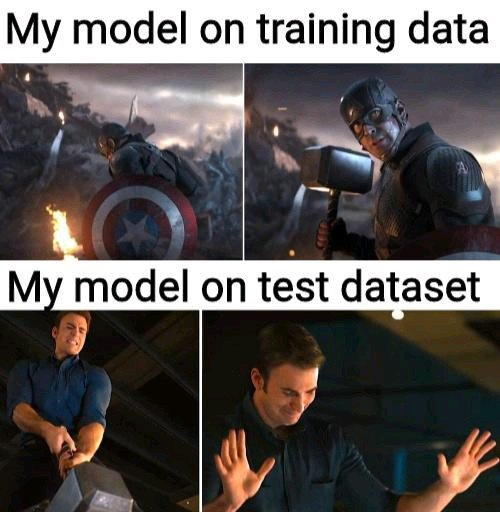

In [ ]:
print(classification_report(y_val,y_pred))


              precision    recall  f1-score   support

           0       0.82      0.72      0.77      6419
           1       0.71      0.81      0.76      5466

    accuracy                           0.76     11885
   macro avg       0.77      0.77      0.76     11885
weighted avg       0.77      0.76      0.76     11885



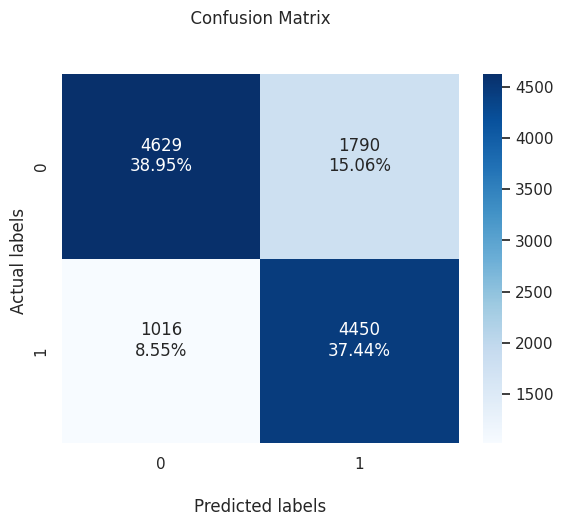

In [ ]:
plot_confusion_matrix(y_val,y_pred)


In [ ]:
y_predict=XGB_tfidf_pipe.predict(x_test)
y_predict

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
y_predict_pro=XGB_tfidf_pipe.predict_proba(x_test)
y_predict_pro

array([[0.45897835, 0.54102165],
       [0.45897835, 0.54102165],
       [0.38578373, 0.61421627],
       ...,
       [0.9551846 , 0.04481545],
       [0.44426358, 0.5557364 ],
       [0.15275514, 0.84724486]], dtype=float32)

In [ ]:
id=test_data['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'label': y_predict_pro[:,1]})

pred_df.to_csv('XGB_tfidf_T1.csv', index=False)
     

**Trail 2 after first preprocessing with xgb_classifier with changing some hyper parameters**

In [ ]:
XGB_tfidf_pipe_T2 = Pipeline([("tfidf", TfidfVectorizer(ngram_range=(1,3),analyzer="char")), ('XGB', XGBClassifier(n_estimators=40,max_depth=20))])
#fit the model and print the score the model
XGB_tfidf_pipe_T2.fit(x_train, y_train) 

Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=20, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=40,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [ ]:
XGB_tfidf_pipe_T2.score(x_train, y_train)


0.9992637468972191

In [ ]:
y_pred_xg_2_t2= XGB_tfidf_pipe_T2.predict(x_val)


In [ ]:
y_pred_xg_2_t2

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
#Accuracy
Accuracy=accuracy_score(y_val,y_pred_xg_2_t2) 
print("XGB_trail2_Accuracy:  " , (Accuracy))

XGB_trail2_Accuracy:   0.8450988641144299


**when trying another trail with changing some hparameters the accuracy is better than the first trail**



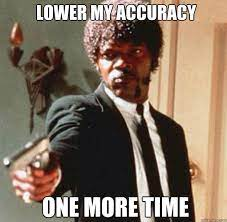

In [ ]:
print(classification_report(y_val,y_pred_xg_2_t2))


              precision    recall  f1-score   support

           0       0.89      0.81      0.85      6419
           1       0.80      0.89      0.84      5466

    accuracy                           0.85     11885
   macro avg       0.85      0.85      0.84     11885
weighted avg       0.85      0.85      0.85     11885



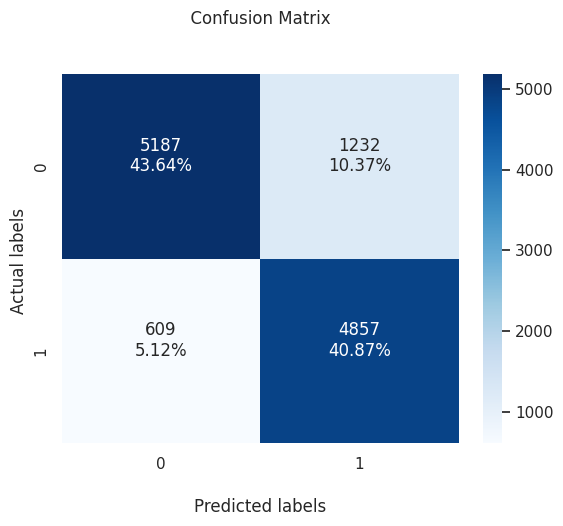

In [ ]:
plot_confusion_matrix(y_val,y_pred_xg_2_t2)


In [ ]:
y_predict_XGB_tfidf_T2=XGB_tfidf_pipe_T2.predict(x_test)
y_predict_XGB_tfidf_T2

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
y_predict_pro_XGB_tfidf_T2=XGB_tfidf_pipe_T2.predict_proba(x_test)
y_predict_pro_XGB_tfidf_T2

array([[0.3934971 , 0.6065029 ],
       [0.946846  , 0.05315397],
       [0.90923405, 0.09076596],
       ...,
       [0.91136044, 0.08863958],
       [0.513186  , 0.48681402],
       [0.11851436, 0.88148564]], dtype=float32)

In [ ]:
id=test_data['id']
pred_df= pd.DataFrame(data={'id': np.asarray(id), 'label': y_predict_pro_XGB_tfidf_T2[:,1]})

pred_df.to_csv('XGB2_tfidf_FS_T2.csv', index=False)

**trail 3 for xgb changing hyper-parameters using grid search and validation set and we will see how much it will affect the accuracy**  💣

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit
# Split Data to Train and Validation
X_train_gr, X_val_gr, y_train_gr, y_val_gr = train_test_split(x_train, y_train, train_size = 0.8)

In [ ]:
x_train_1= df_train.text
y_train_1= df_train.label
x_val_1= df_val.text
y_val_1= df_val.label

In [ ]:
# Create a list where train data indices are -1 and validation data indices are 0
split_index = [-1 if x in X_train_gr.index else 0 for x in df_train.text.index]
# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)

In [ ]:
# feature creation and modelling in a single function
XGB_tfidf_pipe_GS = Pipeline([("tfidf", TfidfVectorizer()), ('XGB', XGBClassifier())])

# define parameter space to test 
XGB_tfidf_pipe_params = {
    "tfidf__ngram_range": [(1,2),(1, 3)],
    "tfidf__analyzer":["word","char"],
    'XGB__n_estimators': [ 40],  
    'XGB__max_depth':[20] ,
    #"tfidf__max_df": np.arange(0.3, 0.8),
    #"tfidf__min_df": np.arange(5, 10),

}

In [ ]:
#calculate running time
%%time
# Use PredefinedSplit in GridSearchCV
XGB_tfidf_pipe_Grid_clf_FS = GridSearchCV(XGB_tfidf_pipe, XGB_tfidf_pipe_params, cv=pds, verbose=1, n_jobs=2, scoring="f1_macro")
XGB_tfidf_pipe_Grid_clf_FS.fit(x_train_1, y_train_1)

Fitting 1 folds for each of 4 candidates, totalling 4 fits
CPU times: user 15min 49s, sys: 2.7 s, total: 15min 52s
Wall time: 27min 36s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(ngram_range=(1, 2))),
                                       ('XGB',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_ty...
                                                      max_delta_step=None,
                                                      max_depth=20,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=40,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=2,
             param_grid={'XGB__max_depth': [20], 'XGB__n_estimators': [40],
                         'tfidf__analyzer': ['word', 'char'],
                         'tfidf__ngram_range': [(1, 2), (1, 3)]},
             scoring='f1_macro', verbose=1)

In [ ]:
print('best params {}'.format(XGB_tfidf_pipe_Grid_clf_FS.best_params_))
print('best score {}'.format(XGB_tfidf_pipe_Grid_clf_FS.best_score_))
print('best estimator {}'.format(XGB_tfidf_pipe_Grid_clf_FS.best_estimator_))

best params {'XGB__max_depth': 20, 'XGB__n_estimators': 40, 'tfidf__analyzer': 'char', 'tfidf__ngram_range': (1, 3)}
best score 0.8483156638500287
best estimator Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                

In [ ]:
# run pipe with optimized parameters
XGB_tfidf_pipe_Grid_clf_FS.best_estimator_.fit(x_train_1, y_train_1)

Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=20, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=40,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [ ]:
XGB_tfidf_pipe_Grid_clf_FS.best_estimator_.score(x_train_1, y_train_1)


0.9992637468972191

In [ ]:
y_pred_validation_XGB_tfidf_pipe_GS =XGB_tfidf_pipe_Grid_clf_FS.best_estimator_.predict(x_val_1)


In [ ]:
y_pred_validation_XGB_tfidf_pipe_GS


array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
#Accuracy
Accuracy= accuracy_score(y_val_1 , y_pred_validation_XGB_tfidf_pipe_GS) 
print("XGB_tfidf_pipe_GS_Accuracy:  " , (Accuracy))

XGB_tfidf_pipe_GS_Accuracy:   0.8450988641144299


**when using grid search the aaccuracy remain the same and does not change on the validation data  😩**

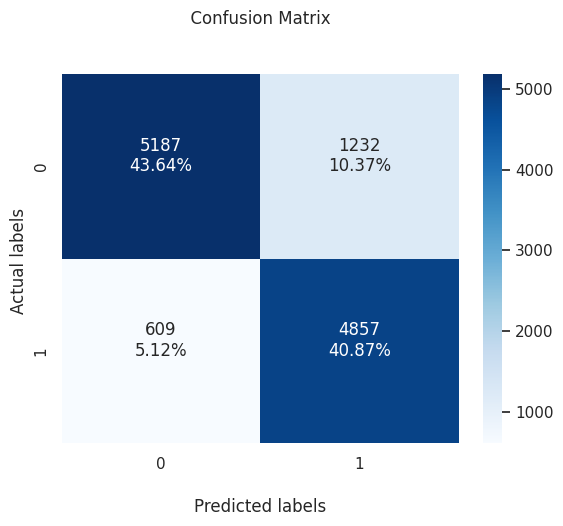

In [ ]:
plot_confusion_matrix(y_val_1,y_pred_validation_XGB_tfidf_pipe_GS)


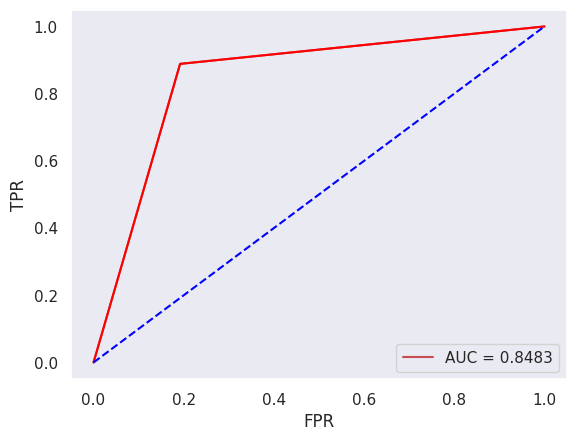

In [ ]:
plot_roc_curve(y_val_1,y_pred_validation_XGB_tfidf_pipe_GS)


In [ ]:
y_predict_XGB_tfidf_pipe_GS=XGB_tfidf_pipe_Grid_clf_FS.best_estimator_.predict(x_test)
y_predict_XGB_tfidf_pipe_GS

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
y_predict_pro_XGB_tfidf_pipe_GS=XGB_tfidf_pipe_Grid_clf_FS.best_estimator_.predict_proba(x_test)
y_predict_pro_XGB_tfidf_pipe_GS

array([[0.3934971 , 0.6065029 ],
       [0.946846  , 0.05315397],
       [0.90923405, 0.09076596],
       ...,
       [0.91136044, 0.08863958],
       [0.513186  , 0.48681402],
       [0.11851436, 0.88148564]], dtype=float32)

In [ ]:
id=test_id
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'label': y_predict_pro_XGB_tfidf_pipe_GS[:,1]})

pred_df.to_csv('XGB_tfidf_pipe_GS1.csv', index=False)

**trail 1 for logestic regression using tfidf**

In [ ]:
LR_tfidf_pipe = Pipeline([("tfidf", TfidfVectorizer(ngram_range=(1,2),analyzer="word")), ('LogisticRegression', LogisticRegression())])
#fit the model and print the score the model
LR_tfidf_pipe.fit(x_train_1, y_train_1) 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
                ('LogisticRegression', LogisticRegression())])

In [ ]:
LR_tfidf_pipe.score(x_train_1, y_train_1)


0.9194118389498928

In [ ]:
y_pred_validation_LR_tfidf_T1 = LR_tfidf_pipe.predict(x_val_1)


In [ ]:
y_pred_validation_LR_tfidf_T1


array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
#Accuracy
Accuracy=accuracy_score(y_val_1,y_pred_validation_LR_tfidf_T1) 
print("LR_FS_T1_Accuracy:  " , (Accuracy))

LR_FS_T1_Accuracy:   0.8158182583087926


In [ ]:
print(classification_report(y_val_1,y_pred_validation_LR_tfidf_T1))


              precision    recall  f1-score   support

           0       0.83      0.82      0.83      6419
           1       0.80      0.81      0.80      5466

    accuracy                           0.82     11885
   macro avg       0.81      0.82      0.81     11885
weighted avg       0.82      0.82      0.82     11885



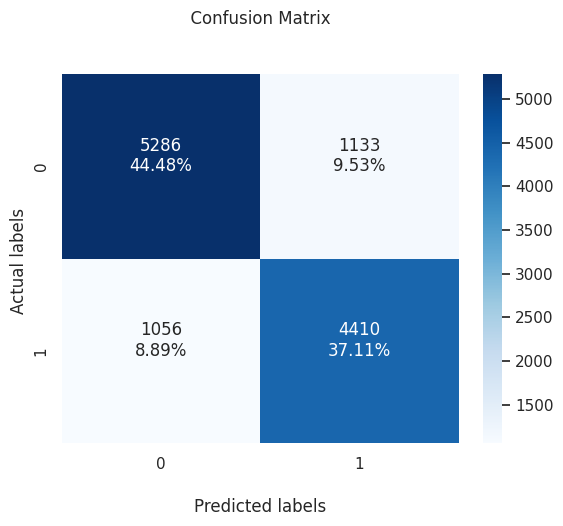

In [ ]:
plot_confusion_matrix(y_val_1,y_pred_validation_LR_tfidf_T1)


In [ ]:
y_predict_LR_tfidf_T1=LR_tfidf_pipe.predict(x_test)
y_predict_LR_tfidf_T1

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
y_predict_pro_LR_tfidf_T1=LR_tfidf_pipe.predict_proba(x_test)
y_predict_pro_LR_tfidf_T1

array([[0.53022598, 0.46977402],
       [0.726716  , 0.273284  ],
       [0.41964238, 0.58035762],
       ...,
       [0.75288218, 0.24711782],
       [0.77300094, 0.22699906],
       [0.24482172, 0.75517828]])

In [ ]:
id=test_id
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'label': y_predict_pro_LR_tfidf_T1[:,1]})

pred_df.to_csv('LR_tfidf_FS_T1.csv', index=False)

**logetic regression gives me better accuracy in kaggle (0.86660) and i am still trying to get more better accuracy**

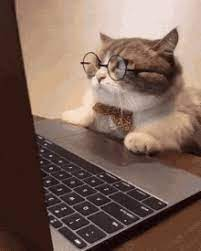


**try logestic regression with tfiDf with changing hparameters**

In [ ]:
LR_tfidf_pipe_T2= Pipeline([("tfidf", TfidfVectorizer(ngram_range=(1,3),analyzer="word")), ('LogisticRegression', LogisticRegression())])
#fit the model and print the score the model
LR_tfidf_pipe_T2.fit(x_train_1, y_train_1) 

Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 3))),
                ('LogisticRegression', LogisticRegression())])

In [ ]:
LR_tfidf_pipe_T2.score(x_train_1, y_train_1)


0.9351676553494047

In [ ]:
y_pred_validation_LR_tfidf_T2 = LR_tfidf_pipe_T2.predict(x_val_1)


In [ ]:
y_pred_validation_LR_tfidf_T2


array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
#Accuracy
Accuracy=accuracy_score(y_val_1,y_pred_validation_LR_tfidf_T2) 
print("LR_FS_T1_Accuracy:  " , (Accuracy))

LR_FS_T1_Accuracy:   0.8100126209507783


**trail2 with change parameters give me a lower accuracy** ⤵

In [ ]:
print(classification_report(y_val_1,y_pred_validation_LR_tfidf_T2))


              precision    recall  f1-score   support

           0       0.83      0.82      0.82      6419
           1       0.79      0.80      0.79      5466

    accuracy                           0.81     11885
   macro avg       0.81      0.81      0.81     11885
weighted avg       0.81      0.81      0.81     11885



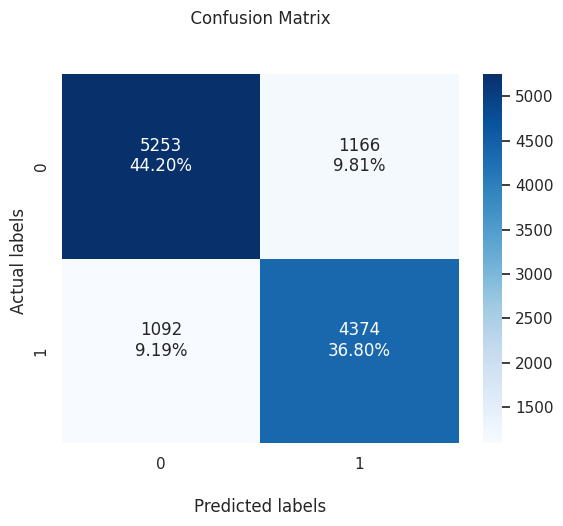

In [ ]:
plot_confusion_matrix(y_val_1,y_pred_validation_LR_tfidf_T2)


In [ ]:
y_predict_LR2_tfidf_T2=LR_tfidf_pipe_T2.predict(x_test)
y_predict_LR2_tfidf_T2

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
y_predict_pro_LR_tfidf_T2=LR_tfidf_pipe_T2.predict_proba(x_test)
y_predict_pro_LR_tfidf_T2

array([[0.53001906, 0.46998094],
       [0.70232843, 0.29767157],
       [0.40158893, 0.59841107],
       ...,
       [0.73898927, 0.26101073],
       [0.74795904, 0.25204096],
       [0.23259507, 0.76740493]])

In [ ]:
id=test_id
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'label': y_predict_pro_LR_tfidf_T2[:,1]})

pred_df.to_csv('LR2_tfidf_T2_.csv', index=False)

**trail 3 logestic regression using random search**

In [ ]:
# feature creation and modelling in a single function
LR_tfidf_pipe = Pipeline([("tfidf", TfidfVectorizer(ngram_range=(1,2),analyzer="word")), ("log", LogisticRegression())])

# define parameter space to test 
LR_tfidf_pipe_params = {
    "tfidf__ngram_range": [(1, 2), (1, 3)],
    "tfidf__analyzer":["word","char"],
    "tfidf__max_df": np.arange(0.3, 0.8),
    "tfidf__min_df": np.arange(5, 100),
    'log__penalty':['l1','l2'],
    'log__C':[1,1e2, 1e3,1e5],
    'log__max_iter':[100,1000,10000],

}
    

In [ ]:
#calculate running time
%%time
LR_tfidf_pipe_RS1 = RandomizedSearchCV(LR_tfidf_pipe, LR_tfidf_pipe_params, cv=5, verbose=1, n_jobs=2, scoring="f1_macro")
LR_tfidf_pipe_RS1.fit(x_train_1, y_train_1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fil

CPU times: user 7.73 s, sys: 420 ms, total: 8.15 s
Wall time: 3min 9s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('tfidf',
                                              TfidfVectorizer(ngram_range=(1,
                                                                           2))),
                                             ('log', LogisticRegression())]),
                   n_jobs=2,
                   param_distributions={'log__C': [1, 100.0, 1000.0, 100000.0],
                                        'log__max_iter': [100, 1000, 10000],
                                        'log__penalty': ['l1', 'l2'],
                                        'tfidf__analyzer': ['word', 'char'],
                                        'tfidf__max_df': array([0.3]),
                                        'tfidf__min_df': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'tfidf__ngram_range': [(1, 2), (1, 3)]},
                   scoring='f1_macro', verbose=1)

In [ ]:
print('best params {}'.format(LR_tfidf_pipe_RS1.best_params_))
print('best score {}'.format(LR_tfidf_pipe_RS1.best_score_))
print('best estimator {}'.format(LR_tfidf_pipe_RS1.best_estimator_))

best params {'tfidf__ngram_range': (1, 2), 'tfidf__min_df': 14, 'tfidf__max_df': 0.3, 'tfidf__analyzer': 'char', 'log__penalty': 'l2', 'log__max_iter': 10000, 'log__C': 1}
best score 0.8174625182224441
best estimator Pipeline(steps=[('tfidf',
                 TfidfVectorizer(analyzer='char', max_df=0.3, min_df=14,
                                 ngram_range=(1, 2))),
                ('log', LogisticRegression(C=1, max_iter=10000))])


In [ ]:
# run pipe with optimized parameters
LR_tfidf_pipe_RS1.best_estimator_.fit(x_train_1, y_train_1)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(analyzer='char', max_df=0.3, min_df=14,
                                 ngram_range=(1, 2))),
                ('log', LogisticRegression(C=1, max_iter=10000))])

In [ ]:
LR_tfidf_pipe_RS1.best_estimator_.score(x_train_1, y_train_1)


0.8293365307753797

In [ ]:
y_pred_validation_LR_tfidf_pipe_RS1 =LR_tfidf_pipe_RS1.best_estimator_.predict(x_val_1)


In [ ]:
y_pred_validation_LR_tfidf_pipe_RS1

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
#Accuracy
Accuracy=accuracy_score(y_val_1,y_pred_validation_LR_tfidf_pipe_RS1) 
print("RS_tfidf_pipe_rf__Accuracy:  " , (Accuracy))

RS_tfidf_pipe_rf__Accuracy:   0.8197728228859907


In [ ]:
print(classification_report(y_val_1,y_pred_validation_LR_tfidf_pipe_RS1))


              precision    recall  f1-score   support

           0       0.86      0.79      0.83      6419
           1       0.78      0.85      0.81      5466

    accuracy                           0.82     11885
   macro avg       0.82      0.82      0.82     11885
weighted avg       0.82      0.82      0.82     11885



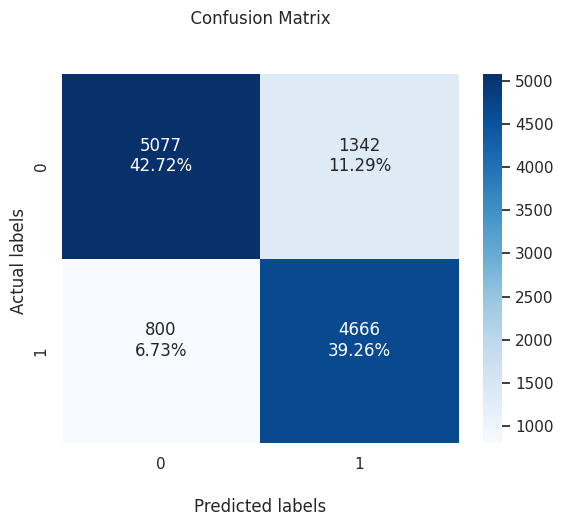

In [ ]:
plot_confusion_matrix(y_val_1,y_pred_validation_LR_tfidf_pipe_RS1)


In [ ]:
y_predict_LR_tfidf_pipe_RS=LR_tfidf_pipe_RS1.best_estimator_.predict(x_test)
y_predict_LR_tfidf_pipe_RS

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
y_predict_pro_LR_tfidf_pipe_RS=LR_tfidf_pipe_RS1.best_estimator_.predict_proba(x_test)
y_predict_pro_LR_tfidf_pipe_RS

array([[0.3233755 , 0.6766245 ],
       [0.13836012, 0.86163988],
       [0.67655264, 0.32344736],
       ...,
       [0.93463327, 0.06536673],
       [0.44054234, 0.55945766],
       [0.26779401, 0.73220599]])

In [ ]:
id=test_id
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'label': y_predict_pro_LR_tfidf_pipe_RS[:,1]})

pred_df.to_csv('LR_tfidf_pipe_RS.csv', index=False)

**trial 2 for random forest without random search with ngram_range=(1,2),analyzer="word"**

In [ ]:
RF_tfidf_pipe = Pipeline([("tfidf", TfidfVectorizer(ngram_range=(1,2),analyzer="word")), ('RandomForestClassifier', RandomForestClassifier())])
#fit the model and print the score the model
RF_tfidf_pipe.fit(x_train_1, y_train_1) 

Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
                ('RandomForestClassifier', RandomForestClassifier())])

In [ ]:
RF_tfidf_pipe.score(x_train_1, y_train_1)


0.9998106777735706

In [ ]:
y_pred_validation_RF_tfidf_T2 = RF_tfidf_pipe.predict(x_val_1)


In [ ]:
y_pred_validation_RF_tfidf_T2

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
#Accuracy
Accuracy=accuracy_score(y_val_1,y_pred_validation_RF_tfidf_T2) 
print("RF_tfidf_FS_T1_Accuracy:  " , (Accuracy))

RF_tfidf_FS_T1_Accuracy:   0.7853596970971813


In [ ]:
print(classification_report(y_val_1,y_pred_validation_RF_tfidf_T2))


              precision    recall  f1-score   support

           0       0.82      0.78      0.80      6419
           1       0.75      0.79      0.77      5466

    accuracy                           0.79     11885
   macro avg       0.78      0.79      0.78     11885
weighted avg       0.79      0.79      0.79     11885



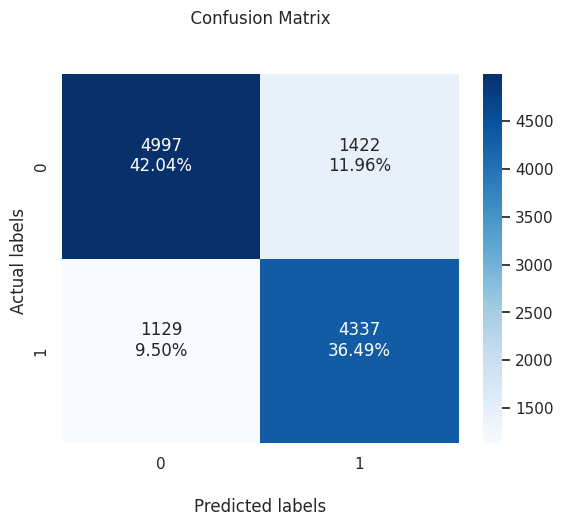

In [ ]:
plot_confusion_matrix(y_val_1,y_pred_validation_RF_tfidf_T2)


In [ ]:
y_predict_RF_tfidf_T2=RF_tfidf_pipe.predict(x_test)
y_predict_RF_tfidf_T2

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
y_predict_pro_RF_tfidf_T2=RF_tfidf_pipe.predict_proba(x_test)
y_predict_pro_RF_tfidf_T2

array([[0.92, 0.08],
       [0.92, 0.08],
       [0.34, 0.66],
       ...,
       [0.69, 0.31],
       [0.67, 0.33],
       [0.31, 0.69]])

In [ ]:
id=test_id
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'label': y_predict_pro_RF_tfidf_T2[:,1]})

pred_df.to_csv('RF_tfidf_FS_T1.csv', index=False)

**trial 3 for random forest without random search with ngram_range=(1,3),analyzer="char"**

In [ ]:
RF_tfidf_pipe_T3 = Pipeline([("tfidf", TfidfVectorizer(ngram_range=(1,3),analyzer="char")), ('RandomForestClassifier', RandomForestClassifier())])
#fit the model and print the score the model
RF_tfidf_pipe_T3.fit(x_train_1, y_train_1) 

Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('RandomForestClassifier', RandomForestClassifier())])

In [ ]:
RF_tfidf_pipe_T3.score(x_train_1, y_train_1)


0.9998106777735706

In [ ]:
y_pred_validation_RF_tfidf_T3 = RF_tfidf_pipe_T3.predict(x_val_1)


In [ ]:
y_pred_validation_RF_tfidf_T3 


array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
#Accuracy
Accuracy=accuracy_score(y_val_1,y_pred_validation_RF_tfidf_T3 ) 
print("RF_tfidf_pipe_T2_Accuracy:  " , (Accuracy))

RF_tfidf_pipe_T2_Accuracy:   0.8153975599495162


In [ ]:
print(classification_report(y_val_1,y_pred_validation_RF_tfidf_T3
))


              precision    recall  f1-score   support

           0       0.87      0.77      0.82      6419
           1       0.76      0.86      0.81      5466

    accuracy                           0.82     11885
   macro avg       0.82      0.82      0.82     11885
weighted avg       0.82      0.82      0.82     11885



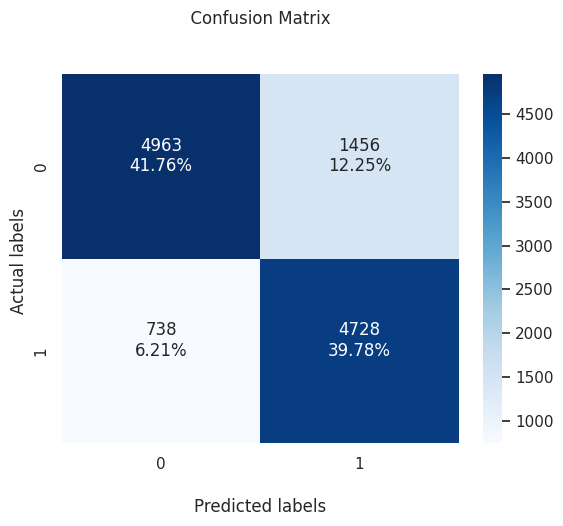

In [ ]:
plot_confusion_matrix(y_val_1,y_pred_validation_RF_tfidf_T3)


In [ ]:
y_predict_RF_tfidf_FS_T3=RF_tfidf_pipe_T3.predict(x_test)
y_predict_RF_tfidf_FS_T3

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
y_predict_pro_RF_tfidf_T3=RF_tfidf_pipe_T3.predict_proba(x_test)
y_predict_pro_RF_tfidf_T3

array([[0.58 , 0.42 ],
       [0.88 , 0.12 ],
       [0.51 , 0.49 ],
       ...,
       [0.7  , 0.3  ],
       [0.4  , 0.6  ],
       [0.315, 0.685]])

In [ ]:
id=test_id
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'label': y_predict_pro_RF_tfidf_T3[:,1]})

pred_df.to_csv('RF_tfidf_T3.csv', index=False)

**try second solution with new preprocessing for data((apply stemming method, remove any html tags,Keep only ASCII + European Chars and whitespace, remove single letter chars) and also check for null values and duplicated**

**starting from cleaning the data as we have a new notebook**

In [ ]:
df_train1=pd.read_csv('/content/xy_train.csv')

In [ ]:
df_train1.shape


(60000, 3)

In [ ]:
df_train1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      60000 non-null  int64 
 1   text    60000 non-null  object
 2   label   60000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ MB


In [ ]:
df_train1.head()


,id,text,label
0,265723,A group of friends began to volunteer at a hom...,0
1,284269,British Prime Minister @Theresa_May on Nerve A...,0
2,207715,"In 1961, Goodyear released a kit that allows P...",0
3,551106,"Happy Birthday, Bob Barker! The Price Is Right...",0
4,8584,"Obama to Nation: 聙""Innocent Cops and Unarmed Y...",0


In [ ]:
df_train1.isnull().sum()


id       0
text     0
label    0
dtype: int64

In [ ]:
df_train1.isnull().sum()


id       0
text     0
label    0
dtype: int64

In [ ]:
#Check the data for duplicates 
df_train1.duplicated().any()
     

False

In [ ]:
df_train1.shape


(60000, 3)

In [ ]:
#lets drop duplicates (if any)
df_train1.drop_duplicates(inplace=True)

In [ ]:
df_train1.shape


(60000, 3)

**from the first solution we know that we should have two labels so we should drop the third label because it is a wrong label**

In [ ]:
#check the target column 
df_train1['label'].value_counts()

0    32172
1    27596
2      232
Name: label, dtype: int64

In [ ]:
# Distribution of label
df_train1["label"].value_counts(normalize=True)

0    0.536200
1    0.459933
2    0.003867
Name: label, dtype: float64

In [ ]:
#"label" should be 0 or 1 so drop any row when "label"=2
df_train_1 = df_train1[df_train1.label != 2]

In [ ]:
df_train_1.shape


(59768, 3)

In [ ]:
#check the target column 
df_train_1['label'].value_counts()

0    32172
1    27596
Name: label, dtype: int64

In [ ]:
# Distribution of label
df_train_1["label"].value_counts(normalize=True)

0    0.538281
1    0.461719
Name: label, dtype: float64

In [ ]:
#describe the text column
df_train_1['text'].describe()

count                                                 59768
unique                                                59413
top       /r/Fakehistoryporn subscribers as they attempt...
freq                                                     14
Name: text, dtype: object

In [ ]:
df_train_1['text'].duplicated().sum()

355

In [ ]:
#Remove the duplicated rows
df_train1.drop_duplicates('text',inplace = True)

In [ ]:
df_train_1.shape


(59768, 3)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import nltk 


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    #RE_TWOCHARACTER=re.compile(r"\b[A-Za-zÀ-ž]\b{2}", re.IGNORECASE)
    #RE_URL=re.compile(r'^https?:\/\/.*[\r\n]*', re.IGNORECASE)

    #remove any html tags (< /br> often found)
    text = re.sub(RE_TAGS, " ", text)
    #Keep only ASCII + European Chars and whitespace, no digits
    text = re.sub(RE_ASCII, " ", text)
    #remove single letter chars
    text = re.sub(RE_SINGLECHAR, " ", text)
     #remove two letter chars
    #text = re.sub(RE_TWOCHARACTER, " ", text)
    #remove URL 
    #text = re.sub(RE_URL, " ", text)
    #convert all whitespaces (tabs etc.) to single wspace
    text = re.sub(RE_WSPACE, " ", text)
    #remove any digit
    text=re.sub(r'\d+', '', text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]
      # (tdf-idf):
      # remove stopwords, punctuation and stemm
    words_filtered = [
      stemmer.stem(word) for word in words_tokens_lower if word not in stop_words
        ]
    text_clean = " ".join(words_filtered)
    return text_clean

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Clean text
df_train_1["text_clean"] =df_train_1.loc[df_train_1["text"].str.len() > 0, "text"]
df_train_1["text_clean"] = df_train_1["text_clean"].map(
    lambda x: clean_text(x) if isinstance(x, str) else x
)

<ipython-input-150-193208308e4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_1["text_clean"] =df_train_1.loc[df_train_1["text"].str.len() > 0, "text"]
<ipython-input-150-193208308e4b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_1["text_clean"] = df_train_1["text_clean"].map(


In [ ]:
df_train_1.head()


,id,text,label,text_clean
0,265723,A group of friends began to volunteer at a hom...,0,group friend began volunt homeless shelter nei...
1,284269,British Prime Minister @Theresa_May on Nerve A...,0,british prime minist theresa may nerv attack f...
2,207715,"In 1961, Goodyear released a kit that allows P...",0,goodyear releas kit allow ps brought heel http...
3,551106,"Happy Birthday, Bob Barker! The Price Is Right...",0,happi birthday bob barker price right host lik...
4,8584,"Obama to Nation: 聙""Innocent Cops and Unarmed Y...",0,obama nation innoc cop unarm young black men d...


In [ ]:
df_train_1.shape


(59768, 4)

In [ ]:
# Drop when any of x missing
df_train_1 = df_train_1[(df_train_1["text_clean"] != "") & (df_train_1["text_clean"] != "null")]

df_train_1 = df_train_1.dropna(
    axis="index", subset=[ "text", "text_clean"]
).reset_index(drop=True)

In [ ]:
df_train_1.shape


(59758, 4)

In [ ]:
from bokeh.models import NumeralTickFormatter
# Word Frequency of most common words
word_freq = pd.Series(" ".join(df_train_1["text_clean"]).split()).value_counts()
word_freq[1:40]

one         3285
like        3128
new         2998
look        2847
color       2737
man         2729
get         2602
trump       2578
say         2347
peopl       2316
use         2307
first       2248
make        2227
old         2226
time        2027
poster      2000
found       1999
day         1935
war         1858
post        1648
world       1570
work        1531
show        1513
us          1506
american    1504
take        1491
life        1482
psbattl     1470
help        1442
go          1420
state       1409
back        1369
two         1364
school      1345
see         1329
photo       1324
made        1314
right       1311
save        1308
dtype: int64

In [ ]:
# list most uncommon words
word_freq[-10:].reset_index(name="freq")

,index,freq
0,angriff,1
1,delusion,1
2,wane,1
3,undament,1
4,miku,1
5,hatsun,1
6,nfler,1
7,hicock,1
8,mccall,1
9,wahr,1


**cleaning test data**

In [ ]:
df_test_1=pd.read_csv('/content/x_test.csv')


In [ ]:
df_test_1.shape


(59151, 2)

In [ ]:
df_test_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59151 entries, 0 to 59150
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      59151 non-null  int64 
 1   text    59151 non-null  object
dtypes: int64(1), object(1)
memory usage: 924.4+ KB


In [ ]:
df_test_1.head()


,id,text
0,0,stargazer
1,1,yeah
2,2,PD: Phoenix car thief gets instructions from Y...
3,3,"As Trump Accuses Iran, He Has One Problem: His..."
4,4,"""Believers"" - Hezbollah 2011"


In [ ]:
# Clean text
df_test_1["text_clean"] = df_test_1.loc[df_test_1["text"].str.len() > 0, "text"]
df_test_1["text_clean"] = df_test_1["text_clean"].map(
    lambda x: clean_text(x) if isinstance(x, str) else x
)

In [ ]:
x_test_1= df_test_1.text_clean

**split the data for the models of the new solution**

In [ ]:
from sklearn.model_selection import train_test_split
# split data (training/testing set)
df_train_11, df_val_1 = train_test_split(df_train_1, test_size=0.2, random_state=10)

In [ ]:
x_train_1 = df_train_11.text_clean
y_train_1 = df_train_11.label
x_val_1= df_val_1.text_clean
y_val_1= df_val_1.label

In [ ]:
print("x_train_text_SS.shape >>>> ",x_train_1.shape)
print("y_train_label_SS.shape >>>> ",y_train_1.shape)
print("x_val_text.shape >>>> ",x_val_1.shape)
print("y_val_label.shape >>>> ",y_val_1.shape)

x_train_text_SS.shape >>>>  (47806,)
y_train_label_SS.shape >>>>  (47806,)
x_val_text.shape >>>>  (11952,)
y_val_label.shape >>>>  (11952,)


**trails for solution 2**


**first trail for xgb using ngram_range=(1,2),analyzer="word"**







In [ ]:
XGB_tfidf_pipe = Pipeline([("tfidf", TfidfVectorizer(ngram_range=(1,2),analyzer="word")), ('XGB', XGBClassifier(n_estimators=40,max_depth=20))])
#fit the model and print the score the model
XGB_tfidf_pipe.fit(x_train_1, y_train_1)

Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=20, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=40,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [ ]:
XGB_tfidf_pipe.score(x_train_1, y_train_1)

0.8439108061749572

In [ ]:
y_pred_validation_XGB_tfidf_T1 = XGB_tfidf_pipe.predict(x_val_1)


In [ ]:
y_pred_validation_XGB_tfidf_T1

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
#Accuracy
Accuracy=accuracy_score(y_val_1,y_pred_validation_XGB_tfidf_T1) 
print("XGB_FS_T1_Accuracy:  " , (Accuracy))

XGB_FS_T1_Accuracy:   0.7259872824631861


**the accuracy seems to be low when using cleaning text data with stemmer**

In [ ]:
print(classification_report(y_val_1,y_pred_validation_XGB_tfidf_T1))


              precision    recall  f1-score   support

           0       0.72      0.80      0.76      6366
           1       0.74      0.64      0.69      5586

    accuracy                           0.73     11952
   macro avg       0.73      0.72      0.72     11952
weighted avg       0.73      0.73      0.72     11952



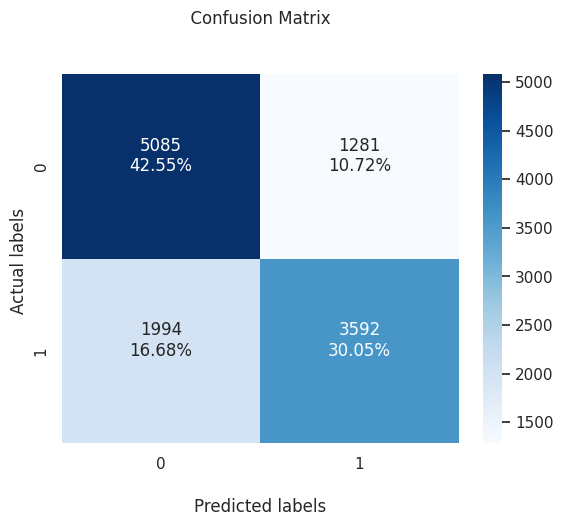

In [ ]:
plot_confusion_matrix(y_val_1,y_pred_validation_XGB_tfidf_T1)


In [ ]:
y_predict_XGB1_tfidf_T1=XGB_tfidf_pipe.predict(x_test_1)
y_predict_XGB1_tfidf_T1

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
y_predict_pro_XGB1_tfidf_T1=XGB_tfidf_pipe.predict_proba(x_test_1)
y_predict_pro_XGB1_tfidf_T1

array([[0.51661515, 0.48338488],
       [0.51661515, 0.48338488],
       [0.57775605, 0.42224398],
       ...,
       [0.9223876 , 0.07761243],
       [0.5724745 , 0.42752552],
       [0.38296247, 0.61703753]], dtype=float32)

In [ ]:
id=df_test_1['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'label': y_predict_pro_XGB1_tfidf_T1[:,1]})

pred_df.to_csv('XGB_sol2_tfidf_T1.csv', index=False)

**trail2 using xgb and using ngram_range=(1,3),analyzer="char"))**

In [ ]:
XGB_tfidf_pipe_T2 = Pipeline([("tfidf", TfidfVectorizer(ngram_range=(1,3),analyzer="char")), ('XGB', XGBClassifier())])
#fit the model and print the score the model
XGB_tfidf_pipe_T2.fit(x_train_1, y_train_1)  
     

Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [ ]:
XGB_tfidf_pipe_T2.score(x_train_1, y_train_1)


0.8690959293812492

In [ ]:
y_pred_validation_XGB_tfidf_SS_T2 = XGB_tfidf_pipe_T2.predict(x_val_1)


In [ ]:
y_pred_validation_XGB_tfidf_SS_T2


array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
#Accuracy
Accuracy=accuracy_score(y_val_1,y_pred_validation_XGB_tfidf_SS_T2) 
print("XGB_FS_T2_Accuracy:  " , (Accuracy))

XGB_FS_T2_Accuracy:   0.7337684069611781


In [ ]:
print(classification_report(y_val_1,y_pred_validation_XGB_tfidf_SS_T2))


              precision    recall  f1-score   support

           0       0.75      0.75      0.75      6366
           1       0.72      0.71      0.71      5586

    accuracy                           0.73     11952
   macro avg       0.73      0.73      0.73     11952
weighted avg       0.73      0.73      0.73     11952



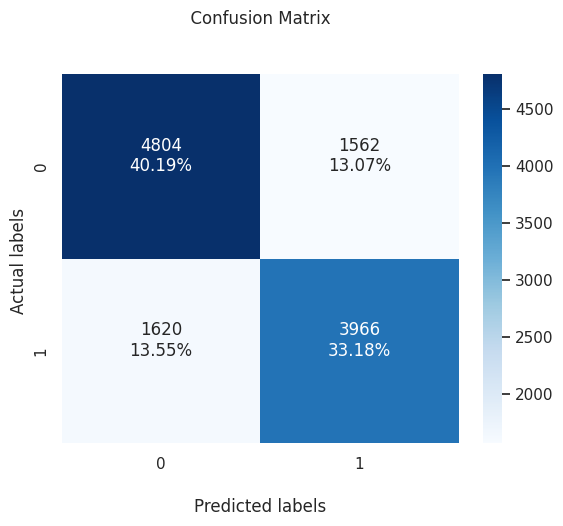

In [ ]:
plot_confusion_matrix(y_val_1,y_pred_validation_XGB_tfidf_SS_T2)


In [ ]:
y_predict_XGB_tfidf_SS_T2=XGB_tfidf_pipe_T2.predict(x_test_1)
y_predict_XGB_tfidf_SS_T2

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
y_predict_pro_XGB_tfidf_SS_T2=XGB_tfidf_pipe_T2.predict_proba(x_test_1)
y_predict_pro_XGB_tfidf_SS_T2

array([[0.6885362 , 0.31146377],
       [0.6922327 , 0.30776724],
       [0.54652333, 0.4534767 ],
       ...,
       [0.8878581 , 0.11214191],
       [0.39567786, 0.60432214],
       [0.3322165 , 0.6677835 ]], dtype=float32)

In [ ]:
id=df_test_1['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'label': y_predict_pro_XGB_tfidf_SS_T2[:,1]})

pred_df.to_csv('XGB_tfidf_SS_T2.csv', index=False)

**still lower accuracy from the first solution  🥺**

**trail 2 for xgb second solution with using trial (Hyperparamter search method (grid) with validation set (not cross-validation))**
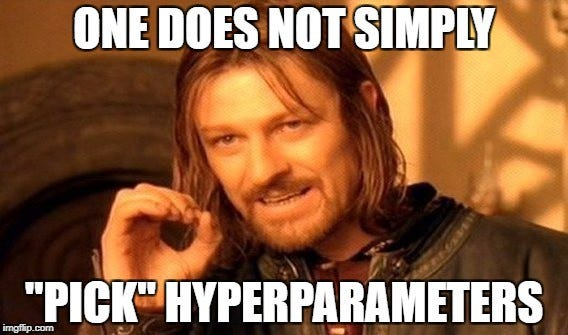

In [ ]:
df_train_11.shape

(47806, 4)

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit
# Split Data to Train and Validation
X_train_GS, X_val_GS, y_train_GS, y_val_GS= train_test_split(x_train_1, y_train_1, train_size = 0.8)

In [ ]:
print("X_train_GS.shape >>>> ",X_train_GS.shape)
print("y_train_GS.shape >>>> ",y_train_GS.shape)
print("X_val_GS.shape >>>> ",X_val_GS.shape)
print("y_val_GS.shape >>>> ",y_val_GS.shape)

X_train_GS.shape >>>>  (38244,)
y_train_GS.shape >>>>  (38244,)
X_val_GS.shape >>>>  (9562,)
y_val_GS.shape >>>>  (9562,)


In [ ]:
x_train_1 = df_train_11.text_clean
y_train_1 = df_train_11.label
x_val_1= df_val_1.text_clean
y_val_1= df_val_1.label

In [ ]:
# Create a list where train data indices are -1 and validation data indices are 0
split_index = [-1 if x in X_train_GS.index else 0 for x in df_train_11.text.index]
# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)

In [ ]:
# feature creation and modelling in a single function
XGB_tfidf_pipe_GS = Pipeline([("tfidf", TfidfVectorizer()), ('XGB', XGBClassifier())])

# define parameter space to test 
XGB_tfidf_pipe_params = {
    "tfidf__ngram_range": [(1,2),(1, 3)],
    "tfidf__analyzer":["word","char"],
    'XGB__n_estimators': [ 40],  
    'XGB__max_depth':[20] ,
    #"tfidf__max_df": np.arange(0.3, 0.8),
    #"tfidf__min_df": np.arange(5, 10),

}


In [ ]:
#calculate running time
%%time
# Use PredefinedSplit in GridSearchCV
XGB_tfidf_pipe_Grid_clf_FS = GridSearchCV(XGB_tfidf_pipe_GS , XGB_tfidf_pipe_params, cv=pds, verbose=1, n_jobs=2, scoring="f1_macro")
XGB_tfidf_pipe_Grid_clf_FS.fit(x_train_1,y_train_1)

Fitting 1 folds for each of 4 candidates, totalling 4 fits
CPU times: user 1min 46s, sys: 450 ms, total: 1min 46s
Wall time: 8min 40s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('XGB',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=No...
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=2,
             param_grid={'XGB__max_depth': [20], 'XGB__n_estimators': [40],
                         'tfidf__analyzer': ['word', 'char'],
                         'tfidf__ngram_range': [(1, 2), (1, 3)]},
             scoring='f1_macro', verbose=1)

In [ ]:
print('best params {}'.format(XGB_tfidf_pipe_Grid_clf_FS .best_params_))
print('best score {}'.format(XGB_tfidf_pipe_Grid_clf_FS .best_score_))

best params {'XGB__max_depth': 20, 'XGB__n_estimators': 40, 'tfidf__analyzer': 'word', 'tfidf__ngram_range': (1, 2)}
best score 0.7250657028272761


In [ ]:
# run pipe with optimized parameters
XGB_tfidf_pipe_GS.set_params(**XGB_tfidf_pipe_Grid_clf_FS.best_params_).fit(X_train_GS, y_train_GS)

Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=20, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=40,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [ ]:
XGB_tfidf_pipe_GS.set_params(**XGB_tfidf_pipe_Grid_clf_FS.best_params_).score(X_train_GS, y_train_GS)


0.8505386465850853

In [ ]:
y_pred_validation_XGB_tfidf_pipe_GS_SS =XGB_tfidf_pipe_GS.set_params(**XGB_tfidf_pipe_Grid_clf_FS.best_params_).predict(X_val_GS)


In [ ]:
y_pred_validation_XGB_tfidf_pipe_GS_SS

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
#Accuracy
Accuracy=accuracy_score(y_val_GS,y_pred_validation_XGB_tfidf_pipe_GS_SS) 
print("XGB_tfidf_pipe_GS_Accuracy:  " , (Accuracy))

XGB_tfidf_pipe_GS_Accuracy:   0.7300773896674336


In [ ]:
print(classification_report(y_val_GS,y_pred_validation_XGB_tfidf_pipe_GS_SS))


              precision    recall  f1-score   support

           0       0.73      0.79      0.76      5205
           1       0.73      0.65      0.69      4357

    accuracy                           0.73      9562
   macro avg       0.73      0.72      0.73      9562
weighted avg       0.73      0.73      0.73      9562



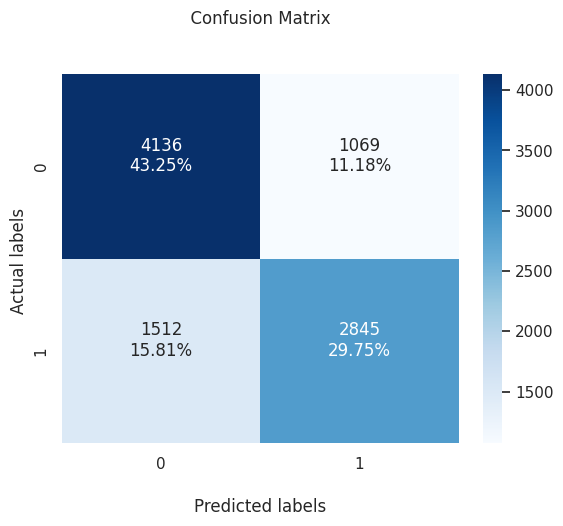

In [ ]:
plot_confusion_matrix(y_val_GS,y_pred_validation_XGB_tfidf_pipe_GS_SS)


In [ ]:
y_predict_XGB_tfidf_pipe_GS_SS=XGB_tfidf_pipe_GS.set_params(**XGB_tfidf_pipe_Grid_clf_FS.best_params_).predict(x_test_1)
y_predict_XGB_tfidf_pipe_GS_SS

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
y_predict_pro_XGB_tfidf_pipe_GS_SS=XGB_tfidf_pipe_GS.set_params(**XGB_tfidf_pipe_Grid_clf_FS.best_params_).predict_proba(x_test_1)
y_predict_pro_XGB_tfidf_pipe_GS_SS

array([[0.5198468 , 0.48015317],
       [0.5198468 , 0.48015317],
       [0.57438815, 0.42561182],
       ...,
       [0.93881047, 0.06118951],
       [0.5198468 , 0.48015317],
       [0.3700382 , 0.6299618 ]], dtype=float32)

In [ ]:
id=df_test_1['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'label': y_predict_pro_XGB_tfidf_pipe_GS_SS[:,1]})

pred_df.to_csv('XGB_tfidf_pipe_GS_SS.csv', index=False)

**grid search using preprocessing of text data gives me a low accuracy than first solution about .75**

**trial (Pipeline([("tfidf", TfidfVectorizer(ngram_range=(1,2),analyzer="word")), ('RandomForestClassifier', RandomForestClassifier())]))**


In [ ]:
RF_tfidf_pipe = Pipeline([("tfidf", TfidfVectorizer(ngram_range=(1,2),analyzer="word")), ('RandomForestClassifier', RandomForestClassifier())])
#fit the model and print the score the model
RF_tfidf_pipe.fit(x_train_1, y_train_1)  

Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
                ('RandomForestClassifier', RandomForestClassifier())])

In [ ]:
RF_tfidf_pipe.score(x_train_1, y_train_1)


0.9998954106179141

In [ ]:
y_pred_validation_RF_tfidf_SS_T1 = RF_tfidf_pipe.predict(x_val_1)


In [ ]:
y_pred_validation_RF_tfidf_SS_T1


array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
#Accuracy
Accuracy=accuracy_score(y_val_1,y_pred_validation_RF_tfidf_SS_T1) 
print("RF_tfidf_SS_T1_Accuracy:  " , (Accuracy))

RF_tfidf_SS_T1_Accuracy:   0.7633032128514057


In [ ]:
print(classification_report(y_val_1,y_pred_validation_RF_tfidf_SS_T1))


              precision    recall  f1-score   support

           0       0.78      0.78      0.78      6366
           1       0.75      0.75      0.75      5586

    accuracy                           0.76     11952
   macro avg       0.76      0.76      0.76     11952
weighted avg       0.76      0.76      0.76     11952



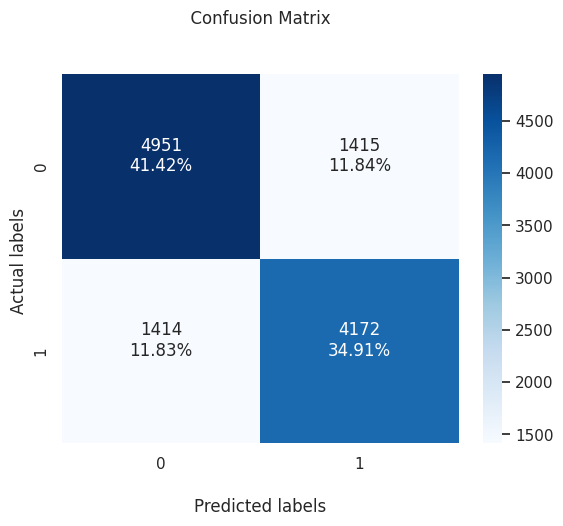

In [ ]:
plot_confusion_matrix(y_val_1,y_pred_validation_RF_tfidf_SS_T1)


In [ ]:
y_predict_RF_tfidf_SS_T1=RF_tfidf_pipe.predict(x_test_1)
y_predict_RF_tfidf_SS_T1

In [ ]:
y_predict_pro_RF_tfidf_SS_T1=RF_tfidf_pipe.predict_proba(x_test_1)
y_predict_pro_RF_tfidf_SS_T1

array([[1.  , 0.  ],
       [0.96, 0.04],
       [0.54, 0.46],
       ...,
       [0.72, 0.28],
       [0.83, 0.17],
       [0.33, 0.67]])

In [ ]:
id=df_test_1['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'label': y_predict_pro_RF_tfidf_SS_T1[:,1]})

pred_df.to_csv('RF1_tfidf_SS_T1_sol2.csv', index=False)

**random forest give me low accuracy than random forest using preprocessing in the first solution**

**trial (Pipeline([("tfidf", TfidfVectorizer(ngram_range=(1,3),analyzer="char")), ('RandomForestClassifier', RandomForestClassifier())]))**


In [ ]:
RF_tfidf_pipe_T2 = Pipeline([("tfidf", TfidfVectorizer(ngram_range=(1,3),analyzer="char")), ('RandomForestClassifier', RandomForestClassifier())])
#fit the model and print the score the model
RF_tfidf_pipe_T2.fit(x_train_1, y_train_1)

Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('RandomForestClassifier', RandomForestClassifier())])

In [ ]:
RF_tfidf_pipe_T2.score(x_train_1, y_train_1)


0.9998954106179141

In [ ]:
y_pred_validation_RF_tfidf_SS_T2 = RF_tfidf_pipe_T2.predict(x_val_1)


In [ ]:
y_pred_validation_RF_tfidf_SS_T2


array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
#Accuracy
Accuracy=accuracy_score(y_val_1,y_pred_validation_RF_tfidf_SS_T2) 
print("RF_tfidf_pipe_T2_Accuracy:  " , (Accuracy))

RF_tfidf_pipe_T2_Accuracy:   0.7034805890227577


In [ ]:
print(classification_report(y_val_1,y_pred_validation_RF_tfidf_SS_T2))


              precision    recall  f1-score   support

           0       0.70      0.79      0.74      6366
           1       0.71      0.61      0.66      5586

    accuracy                           0.70     11952
   macro avg       0.71      0.70      0.70     11952
weighted avg       0.70      0.70      0.70     11952



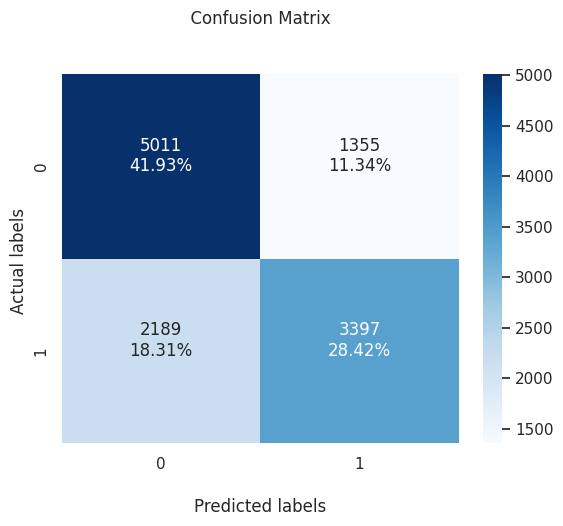

In [ ]:
plot_confusion_matrix(y_val_1,y_pred_validation_RF_tfidf_SS_T2)


In [ ]:
y_predict_RF_tfidf_SS_T2=RF_tfidf_pipe_T2.predict(x_test_1)
y_predict_RF_tfidf_SS_T2

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
y_predict_pro_RF_tfidf_SS_T2=RF_tfidf_pipe_T2.predict_proba(x_test_1)
y_predict_pro_RF_tfidf_SS_T2

array([[0.75, 0.25],
       [0.77, 0.23],
       [0.55, 0.45],
       ...,
       [0.66, 0.34],
       [0.55, 0.45],
       [0.48, 0.52]])

In [ ]:
id=df_test_1['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'label': y_predict_pro_RF_tfidf_SS_T2[:,1]})

pred_df.to_csv('RF_tfidf_SS_T2.csv', index=False)

**random forest give me low accuracy than random forest using preprocessing in the first solution**

**sollution 3 using lemitizaion as a preprocessing for data**


**(remove any rows with label=2)and check quality(balance) of data ) and apply text preprocessing for "text" column(apply lemmatization method, remove any html tags,Keep only ASCII + European Chars and whitespace, remove single letter chars**

In [ ]:
df_TS=pd.read_csv('xy_train.csv')


In [ ]:
df_TS.shape


(60000, 3)

In [ ]:
df_TS.head()


,id,text,label
0,265723,A group of friends began to volunteer at a hom...,0
1,284269,British Prime Minister @Theresa_May on Nerve A...,0
2,207715,"In 1961, Goodyear released a kit that allows P...",0
3,551106,"Happy Birthday, Bob Barker! The Price Is Right...",0
4,8584,"Obama to Nation: 聙""Innocent Cops and Unarmed Y...",0


In [ ]:
#Check the data for missing values in training data
df_TS.isnull().sum()

id       0
text     0
label    0
dtype: int64

In [ ]:
#Check the data for duplicates 
df_TS.duplicated().any()
     

False

In [ ]:
df_TS.shape


(60000, 3)

In [ ]:
#lets drop duplicates (if any)
df_TS.drop_duplicates(inplace=True)

In [ ]:
df_TS.shape


(60000, 3)

In [ ]:
#check the target column 
df_TS['label'].value_counts()

0    32172
1    27596
2      232
Name: label, dtype: int64

In [ ]:
# Distribution of label
df_TS["label"].value_counts(normalize=True)

0    0.536200
1    0.459933
2    0.003867
Name: label, dtype: float64

In [ ]:
df_TS.shape


(60000, 3)

In [ ]:
#"label" should be 0 or 1 so drop any row when "label"=2
df_TS = df_TS[df_TS.label != 2]

In [ ]:
df_TS.shape


(59768, 3)

In [ ]:
#check the target column 
df_TS['label'].value_counts()

0    32172
1    27596
Name: label, dtype: int64

In [ ]:
#describe the text column
df_TS['text'].describe()

count                                                 59768
unique                                                59413
top       /r/Fakehistoryporn subscribers as they attempt...
freq                                                     14
Name: text, dtype: object

In [ ]:
df_TS['text'].duplicated().sum()


355

In [ ]:
#Remove the duplicated rows
df_TS.drop_duplicates('text',inplace = True)

In [ ]:
df_TS.shape


(59413, 3)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import nltk 
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def clean_text_TS(text):
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zA-z ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zA-z]\b", re.IGNORECASE)
    #RE_TWOCHARACTER=re.compile(r"\b[A-Za-zÀ-ž]\b{2}", re.IGNORECASE)
    #RE_URL=re.compile(r'^https?:\/\/.*[\r\n]*', re.IGNORECASE)
    
   # remove any html tags (< /br> often found)
    text = re.sub(RE_TAGS, " ", text)
    #Keep only ASCII + European Chars and whitespace, no digits
    text = re.sub(RE_ASCII, " ", text)
    #remove single letter chars
    text = re.sub(RE_SINGLECHAR, " ", text)
     #remove two letter chars
    #text = re.sub(RE_TWOCHARACTER, " ", text)
    #remove URL 
    #text = re.sub(RE_URL, " ", text)
    #convert all whitespaces (tabs etc.) to single wspace
    text = re.sub(RE_WSPACE, " ", text)
    #remove any digit
    text=re.sub(r'\d+', '', text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    
    # (tdf-idf):
    # - remove stopwords, punctuation and stemm
    words_filtered = [
           lemmatizer.lemmatize(word) for word in words_tokens_lower if word not in stop_words
        ]

    text_clean = " ".join(words_filtered)
    return text_clean

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Clean text
df_TS["text_clean"] = df_TS.loc[df_TS["text"].str.len() > 0, "text"]
df_TS["text_clean"] = df_TS["text_clean"].map(
    lambda x: clean_text_TS(x) if isinstance(x, str) else x
)

In [ ]:
df_TS.head()


,id,text,label,text_clean
0,265723,A group of friends began to volunteer at a hom...,0,group friend began volunteer homeless shelter ...
1,284269,British Prime Minister @Theresa_May on Nerve A...,0,british prime minister theresa_may nerve attac...
2,207715,"In 1961, Goodyear released a kit that allows P...",0,goodyear released kit allows p brought heel ht...
3,551106,"Happy Birthday, Bob Barker! The Price Is Right...",0,happy birthday bob barker price right host lik...
4,8584,"Obama to Nation: 聙""Innocent Cops and Unarmed Y...",0,obama nation innocent cop unarmed young black ...


In [ ]:
df_TS.shape


(59413, 4)

In [ ]:
# Drop when any of x missing
df_TS = df_TS[(df_TS["text_clean"] != "") & (df_TS["text_clean"] != "null")]

df_TS = df_TS.dropna(
    axis="index", subset=[ "text", "text_clean"]
).reset_index(drop=True)

In [ ]:
df_TS.shape


(59404, 4)

In [ ]:
from bokeh.models import NumeralTickFormatter
# Word Frequency of most common words
word_freq = pd.Series(" ".join(df_TS["text_clean"]).split()).value_counts()
word_freq[1:40]

one          3272
[            3259
]            3238
new          2972
like         2939
man          2693
trump        2551
colorized    2419
people       2310
first        2231
old          2212
look         2208
say          2122
get          2063
time         2002
poster       1968
found        1956
day          1926
woman        1881
war          1841
life         1763
make         1726
world        1565
u            1496
american     1483
state        1381
two          1357
post         1351
school       1328
back         1319
made         1310
photo        1288
right        1266
circa        1246
child        1207
president    1193
see          1175
house        1171
know         1167
dtype: int64

In [ ]:
# list most uncommon words
word_freq[-10:].reset_index(name="freq")

,index,freq
0,mudlarking,1
1,cumberlandite,1
2,prohibid,1
3,itan,1
4,watercress,1
5,chive,1
6,incentivizes,1
7,bozo,1
8,hapless,1
9,wahre,1


**Data cleaning for test data**


In [ ]:
df_test_TS_K=pd.read_csv('x_test.csv')


In [ ]:
df_test_TS_K.shape


(59151, 2)

In [ ]:
df_test_TS_K.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59151 entries, 0 to 59150
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      59151 non-null  int64 
 1   text    59151 non-null  object
dtypes: int64(1), object(1)
memory usage: 924.4+ KB


In [ ]:
df_test_TS_K.head()


,id,text
0,0,stargazer
1,1,yeah
2,2,PD: Phoenix car thief gets instructions from Y...
3,3,"As Trump Accuses Iran, He Has One Problem: His..."
4,4,"""Believers"" - Hezbollah 2011"


In [ ]:
# Clean text
df_test_TS_K["text_clean"] = df_test_TS_K.loc[df_test_TS_K["text"].str.len() > 0, "text"]
df_test_TS_K["text_clean"] = df_test_TS_K["text_clean"].map(
    lambda x: clean_text_TS(x) if isinstance(x, str) else x
)

In [ ]:
df_test_TS_K.head()


,id,text,text_clean
0,0,stargazer,stargazer
1,1,yeah,yeah
2,2,PD: Phoenix car thief gets instructions from Y...,pd phoenix car thief get instruction youtube v...
3,3,"As Trump Accuses Iran, He Has One Problem: His...",trump accuses iran one problem credibility
4,4,"""Believers"" - Hezbollah 2011",believer hezbollah


In [ ]:
x_test_text_TS_k = df_test_TS_K.text_clean


**split the data**


In [ ]:

from sklearn.model_selection import train_test_split
# split data (training/testing set)
df_train_TS, df_val_TS = train_test_split(df_TS, test_size=0.2, random_state=10)

In [ ]:
x_train_text_TS = df_train_TS.text_clean
y_train_label_TS = df_train_TS.label
x_val_text_TS = df_val_TS.text_clean
y_val_label_TS = df_val_TS.label

In [ ]:
print("x_train_text_TS.shape >>>> ",x_train_text_TS.shape)
print("y_train_label_TS.shape >>>> ",y_train_label_TS.shape)
print("x_val_text_TS.shape >>>> ",x_val_text_TS.shape)
print("y_val_label_TS.shape >>>> ",y_val_label_TS.shape)

x_train_text_TS.shape >>>>  (47523,)
y_train_label_TS.shape >>>>  (47523,)
x_val_text_TS.shape >>>>  (11881,)
y_val_label_TS.shape >>>>  (11881,)


**trails for solution3**

**trial (Pipeline([("tfidf", TfidfVectorizer(ngram_range=(1,2),analyzer="word")), ('XGB', XGBClassifier())]))**


In [ ]:
XGB_tfidf_pipe = Pipeline([("tfidf", TfidfVectorizer(ngram_range=(1,2),analyzer="word")), ('XGB', XGBClassifier())])
#fit the model and print the score the model
XGB_tfidf_pipe.fit(x_train_text_TS, y_train_label_TS)

Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [ ]:
XGB_tfidf_pipe.score(x_train_text_TS, y_train_label_TS)


0.792311091471498

In [ ]:
y_pred_validation_XGB_tfidf_TS_T1 = XGB_tfidf_pipe.predict(x_val_text_TS)


In [ ]:
y_pred_validation_XGB_tfidf_TS_T1


array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
#Accuracy
Accuracy=accuracy_score(y_val_label_TS,y_pred_validation_XGB_tfidf_TS_T1) 
print("XGB_TS_T1_Accuracy:  " , (Accuracy))

XGB_TS_T1_Accuracy:   0.7204780742361754


In [ ]:
print(classification_report(y_val_label_TS,y_pred_validation_XGB_tfidf_TS_T1))


              precision    recall  f1-score   support

           0       0.71      0.80      0.75      6352
           1       0.73      0.63      0.68      5529

    accuracy                           0.72     11881
   macro avg       0.72      0.71      0.72     11881
weighted avg       0.72      0.72      0.72     11881



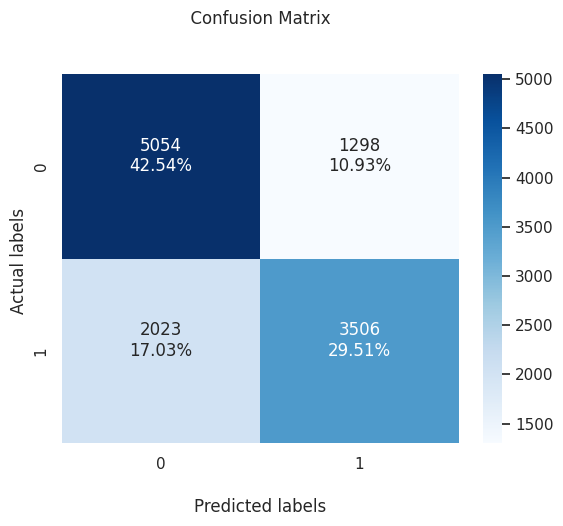

In [ ]:
plot_confusion_matrix(y_val_label_TS,y_pred_validation_XGB_tfidf_TS_T1)


In [ ]:
y_predict_XGB_tfidf_TS_T1=XGB_tfidf_pipe.predict(x_test_text_TS_k)
y_predict_XGB_tfidf_TS_T1

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
y_predict_pro_XGB_tfidf_TS_T1=XGB_tfidf_pipe.predict_proba(x_test_text_TS_k)
y_predict_pro_XGB_tfidf_TS_T1

array([[0.51560605, 0.48439392],
       [0.51560605, 0.48439392],
       [0.4984169 , 0.5015831 ],
       ...,
       [0.948492  , 0.051508  ],
       [0.58045626, 0.41954377],
       [0.4046495 , 0.5953505 ]], dtype=float32)

In [ ]:
id=df_test_TS_K['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'label': y_predict_pro_XGB_tfidf_TS_T1[:,1]})

pred_df.to_csv('XGB_tfidf_TS_T1.csv', index=False)

**trial (Pipeline([("tfidf", TfidfVectorizer(ngram_range=(1,3),analyzer="char")), ('XGB', XGBClassifier())]))**


In [ ]:
XGB_tfidf_pipe_T2 = Pipeline([("tfidf", TfidfVectorizer(ngram_range=(1,3),analyzer="char")), ('XGB', XGBClassifier())])
#fit the model and print the score the model
XGB_tfidf_pipe_T2.fit(x_train_text_TS, y_train_label_TS) 

Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [ ]:
XGB_tfidf_pipe_T2.score(x_train_text_TS, y_train_label_TS)


0.8779538328809208

In [ ]:
y_pred_validation_XGB_tfidf_TS_T2 = XGB_tfidf_pipe_T2.predict(x_val_text_TS)


In [ ]:
y_pred_validation_XGB_tfidf_TS_T2


array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
#Accuracy
Accuracy=accuracy_score(y_val_label_TS,y_pred_validation_XGB_tfidf_TS_T2) 
print("XGB_TS_T1_Accuracy:  " , (Accuracy))

XGB_TS_T1_Accuracy:   0.732093258143254


In [ ]:
print(classification_report(y_val_label_TS,y_pred_validation_XGB_tfidf_TS_T2))


              precision    recall  f1-score   support

           0       0.75      0.74      0.75      6352
           1       0.71      0.72      0.72      5529

    accuracy                           0.73     11881
   macro avg       0.73      0.73      0.73     11881
weighted avg       0.73      0.73      0.73     11881



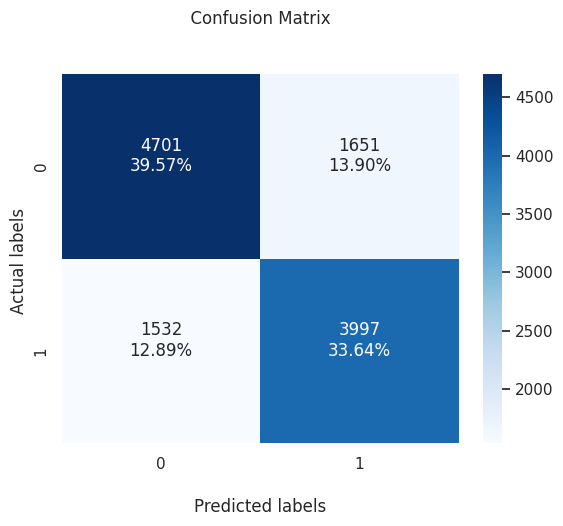

In [ ]:
plot_confusion_matrix(y_val_label_TS,y_pred_validation_XGB_tfidf_TS_T2)


In [ ]:
y_predict_XGB_tfidf_TS_T2=XGB_tfidf_pipe_T2.predict(x_test_text_TS_k)
y_predict_XGB_tfidf_TS_T2

array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
y_predict_pro_XGB_tfidf_TS_T2=XGB_tfidf_pipe_T2.predict_proba(x_test_text_TS_k)
y_predict_pro_XGB_tfidf_TS_T2

array([[0.72889066, 0.2711093 ],
       [0.654509  , 0.345491  ],
       [0.437253  , 0.562747  ],
       ...,
       [0.61440754, 0.38559243],
       [0.4711628 , 0.5288372 ],
       [0.25109953, 0.7489005 ]], dtype=float32)

In [ ]:
id=df_test_TS_K['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'label': y_predict_pro_XGB_tfidf_TS_T2[:,1]})

pred_df.to_csv('XGB_tfidf_TS_T2.csv', index=False)

**XGB USING STEMMING AND LEMITIZATION PREPROCESSING IN DATA GIVE ME almost nearer accuracy in testing**

**#trial (Pipeline([("tfidf", TfidfVectorizer(ngram_range=(1,2),analyzer="word")), ('RandomForestClassifier', RandomForestClassifier())]))**


In [ ]:
RF_tfidf_pipe = Pipeline([("tfidf", TfidfVectorizer(ngram_range=(1,2),analyzer="word")), ('RandomForestClassifier', RandomForestClassifier())])
#fit the model and print the score the model
RF_tfidf_pipe.fit(x_train_text_TS, y_train_label_TS)  

Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
                ('RandomForestClassifier', RandomForestClassifier())])

In [ ]:
RF_tfidf_pipe.score(x_train_text_TS, y_train_label_TS)


0.9999789575573933

In [ ]:
y_pred_validation_RF_tfidf_TS_T1 = RF_tfidf_pipe.predict(x_val_text_TS)


In [ ]:
y_pred_validation_RF_tfidf_TS_T1


array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
#Accuracy
Accuracy=accuracy_score(y_val_label_TS,y_pred_validation_RF_tfidf_TS_T1) 
print("RF_tfidf_TS_T1_Accuracy:  " , (Accuracy))

RF_tfidf_TS_T1_Accuracy:   0.7565861459473109


In [ ]:
print(classification_report(y_val_label_TS,y_pred_validation_RF_tfidf_TS_T1))


              precision    recall  f1-score   support

           0       0.78      0.75      0.77      6352
           1       0.73      0.76      0.74      5529

    accuracy                           0.76     11881
   macro avg       0.76      0.76      0.76     11881
weighted avg       0.76      0.76      0.76     11881



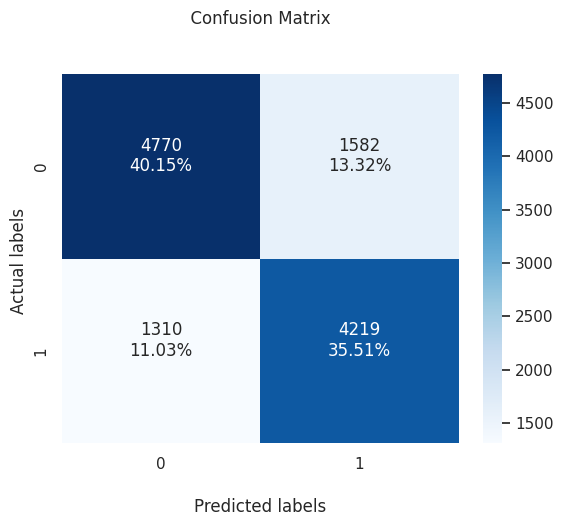

In [ ]:
plot_confusion_matrix(y_val_label_TS,y_pred_validation_RF_tfidf_TS_T1)


In [ ]:
y_predict_RF_tfidf_TS_T1=RF_tfidf_pipe.predict(x_test_text_TS_k)
y_predict_RF_tfidf_TS_T1
     

array([1, 1, 0, ..., 0, 0, 1])

In [ ]:

y_predict_pro_RF_tfidf_TS_T1=RF_tfidf_pipe.predict_proba(x_test_text_TS_k)
y_predict_pro_RF_tfidf_TS_T1

array([[0.31, 0.69],
       [0.38, 0.62],
       [0.5 , 0.5 ],
       ...,
       [0.67, 0.33],
       [0.77, 0.23],
       [0.22, 0.78]])

In [ ]:
id=df_test_TS_K['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'label': y_predict_pro_RF_tfidf_TS_T1[:,1]})

pred_df.to_csv('RF_tfidf_TS_T1.csv', index=False)

**trial (Pipeline([("tfidf", TfidfVectorizer(ngram_range=(1,3),analyzer="char")), ('RandomForestClassifier', RandomForestClassifier())]))**


In [ ]:
RF_tfidf_pipe_T2 = Pipeline([("tfidf", TfidfVectorizer(ngram_range=(1,3),analyzer="char")), ('RandomForestClassifier', RandomForestClassifier())])
#fit the model and print the score the model
RF_tfidf_pipe_T2.fit(x_train_text_TS, y_train_label_TS)  

Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('RandomForestClassifier', RandomForestClassifier())])

In [ ]:
RF_tfidf_pipe_T2.score(x_train_text_TS, y_train_label_TS)


0.9999789575573933

In [ ]:
y_pred_validation_RF_tfidf_TS_T2 = RF_tfidf_pipe_T2.predict(x_val_text_TS)


In [ ]:
y_pred_validation_RF_tfidf_TS_T2


array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
#Accuracy
Accuracy=accuracy_score(y_val_label_TS,y_pred_validation_RF_tfidf_TS_T2) 
print("RF_tfidf_pipe_T2_Accuracy:  " , (Accuracy))

RF_tfidf_pipe_T2_Accuracy:   0.7069270263445838


In [ ]:
print(classification_report(y_val_label_TS,y_pred_validation_RF_tfidf_TS_T2))


              precision    recall  f1-score   support

           0       0.71      0.76      0.73      6352
           1       0.70      0.65      0.67      5529

    accuracy                           0.71     11881
   macro avg       0.71      0.70      0.70     11881
weighted avg       0.71      0.71      0.71     11881



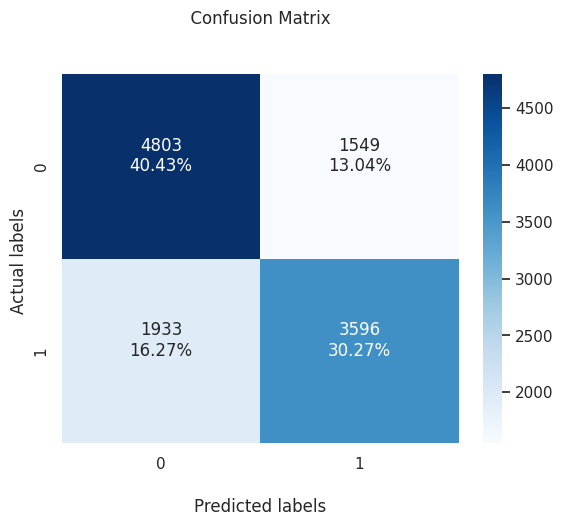

In [ ]:
plot_confusion_matrix(y_val_label_TS,y_pred_validation_RF_tfidf_TS_T2)


In [ ]:
y_predict_RF_tfidf_TS_T2=RF_tfidf_pipe_T2.predict(x_test_text_TS_k)
y_predict_RF_tfidf_TS_T2

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_predict_pro_RF_tfidf_TS_T2=RF_tfidf_pipe_T2.predict_proba(x_test_text_TS_k)
y_predict_pro_RF_tfidf_TS_T2

array([[0.77, 0.23],
       [0.75, 0.25],
       [0.54, 0.46],
       ...,
       [0.69, 0.31],
       [0.59, 0.41],
       [0.57, 0.43]])

In [ ]:
id=df_test_TS_K['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'label': y_predict_pro_RF_tfidf_TS_T2[:,1]})

pred_df.to_csv('RF_tfidf_TS_T2.csv', index=False)

**random forest using lemmitization give me almost the same accuracy using stemming preprocessing 0.86866** 🤙

**the best model that gives me the best accuracy was the rf model using preprocessing in solution one and the preprocessing in solution one was jus remove null values wrong values and duplicated values and it gave me accuracy 0.88326** ☑ 🍉

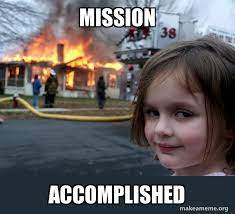


**Discusion**  ✅  ✅   ✅  ✅

**conclusion**: 


after runing  the whole notebook  with the whole pipelines  the best model that gives me the best accuracy in all trials was the random forest but the random forest have a big problem that is overfitting 
the random forest overfitt my model in training and validation set in fitting but it was a surprise that one of the model of randomforest that overfit gives me the best accuracy in  testing kaggle  


**problem overfitting with randomforest**

 and how can  i deal with this problem i see some tutorials and i think this  will help:

 How do you prevent overfitting in random forest models? And how do you treat the problem of overfitting if it does crop up? Here are some easy ways to prevent overfitting in random forests.  

**Reduce tree depth.** If you do believe that your random forest model is overfitting, the first thing you should do is reduce the depth of the trees in your random forest model. Different implementations of random forest models will have different parameters that control this, but generally there will be a parameter that explicitly controls the number of levels deep a tree can get, the number of splits a tree can have, or the minimum size of the terminal nodes. Reducing model complexity generally ameliorates overfitting problems and reducing tree depth is the easiest way to reduce complexity in random forests.


**Reduce the number of variables sampled at each split.** You can also reduce the number of variables considered for each split to introduce more randomness into your model. To take a step back, each time a split is created in a tree, a subset of variables is taken and only those variables are considered to be the variable that is split on. If you consider all or most of your variables at each split, your trees may all end up looking the same because the same splits on the same variables are chosen. If you consider a smaller subset of variables at each split, the trees are less likely to look the same because it is unlikely that the same variables were even available for consideration at each 
split. 



**Use more data**. Finally, you can always try increasing the size of your dataset. Overfitting is more likely to happen when complex models are trained on small datasets so increasing the size of your dataset may help.

refrence:  https://crunchingthedata.com/random-forest-overfitting/






**x_gboost**

** x_gboost is not the model that give me the best accuracy in testing but i use this tutorial that helps me apllying XG to Nlp problems and sentiment analysis **

 https://ai.plainenglish.io/sentiment-classification-using-xgboost-7abdaf4771f9

**logestic regression**

https://towardsai.net/p/nlp/sentiment-analysis-with-logistic-regression
this tutorial helps me for applying logestic regresion to my problem

**after trying all the preprocessing for the data**




**the first solution** i try to use  word and character vectorization only for decoding the data to train the model and i use three model logestic regresion random forest and xgboost and i remove null //wrong // duplicated value from the data and i use more than one search moth to try the hyper parameters and the best  model that give me better accuracy in kaggle was the random forest model was the one using ngram_range=(1,3),analyzer="char" and the accuracy in kaggle was **Score: 0.88326**


**the second solution**
 i try to use word and character vectorization for decoding the data to train the model and i use stemming preprocessing for data and remove null/ duplicated/wrong values from data and the best model that give me best accuracy in kaggle was random forest with accuracy in kaggle 

**Score: 0.86696**


**the third solution**

i try to use word and character vectorization for decoding the data to train the model and i use lemitization preprocessing for data and remove null/ duplicated/wrong values from data and the best model that give me best accuracy in kaggle was random forest with accuracy in kaggle 

**Score: Score: 0.84972**





**why i think random forest give me the best accuracy and almost in all trails it was the best classifier?**

Random Forest is a famous machine learning algorithm that uses supervised learning methods. You can apply it to both classification and regression problems. It is based on ensemble learning, which integrates multiple classifiers to solve a complex issue and increases the model's performance.


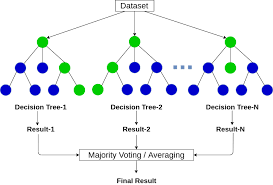




**Questions**


**What is the difference between Character n-gram and Word n-gram? Which one tends to suffer more from the OOV issue?** \

Character n-gram divide text into a set of characters.

Word n-gram divide text into words.


Word n-gram suffer more from the OOV issue

**What is the difference between stop word removal and stemming? Are these techniques language-dependent?** \

Stopwords are the most common words in any natural language, and they may offer little value to the document's meaning.

Stemming is used to return the word to its original form(root form) By slicing off the end or beginning of a word and taking in a list of common prefixes and suffixes that could appear in that word.

Yes, these are language-dependent.

**Is tokenization techniques language dependent? Why? \**

yes, because there are some words that exist in different languages but may have the same or different sounds, and the meaning

**What is the difference between count vectorizer and tf-idf vectorizer? Would it be feasible to use all possible n-grams? If not, how should you select them? \**

CountVectorizer focuses on the frequency of words ( number of times words appear ) in the document but TF-IDF focuses on the frequency of words, and that's important, so we can remove less important words. Model complexity will be reduced by reducing the input dimension.
No, It is selected by the try and error and hyperparameter search methods.